<Figure size 640x480 with 0 Axes>

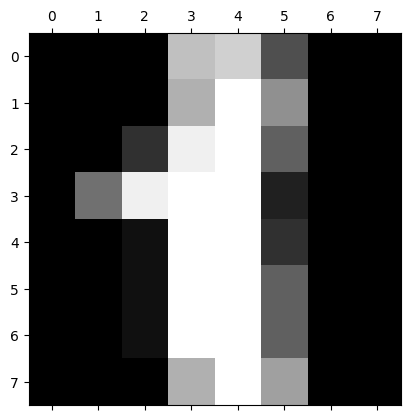

Les données ont une dimension D de 64, car chaque image représente une matrice de 8x8 pixels (soit 64 pixels au total).
Nombre d'exemple par classe : {0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


In [2]:
# 1 - Analyse des données
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
digits = load_digits()

plt.gray()
plt.matshow(digits.images[1]) # Index est le numéro de l’image
plt.show()

# Pour récupérer les données et les labels
X = digits.data
y = digits.target

print ("Les données ont une dimension D de 64, car chaque image représente une matrice de 8x8 pixels (soit 64 pixels au total).")
unique, counts = np.unique(y, return_counts=True)
print("Nombre d'exemple par classe : " + str(dict(zip(unique, counts))))

X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [3]:
# 2 - Apprantissage
from sklearn.neural_network import MLPClassifier

train_scores = []
test_scores = []

for C in range (1,51):
    clf1 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='adaptive', early_stopping=True)
    clf1.fit(X_train, y_train)
    train_scores.append(clf1.score(X_train,y_train))
    test_scores.append(clf1.score(X_test,y_test))

plt.plot(range(1, 51), train_scores, label='Training Score')
plt.plot(range(1, 51), test_scores, label='Test Score')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

Moyenne des scores en apprentissage : [0.20647441 0.36442288 0.45437149 0.7325633  0.81562117 0.9353221
 0.96734928 0.9791655  0.98662858 0.98009718 0.98974238 0.98724921
 0.99004762]
Ecart-type des scores en apprentissage : [0.01184264 0.04851283 0.17135826 0.05672892 0.06703082 0.03151761
 0.01549239 0.01089274 0.00288741 0.00950892 0.00625491 0.00662936
 0.00595169]
Moyenne des scores en validation : [0.20270963 0.33958075 0.4138587  0.6803882  0.73997671 0.87186335
 0.89803571 0.90920031 0.9402795  0.93408385 0.93901398 0.95273292
 0.94028727]
Ecart-type des scores en validation : [0.01239789 0.05180066 0.16629777 0.0441091  0.07118491 0.01929229
 0.04552865 0.01281432 0.02107495 0.02241679 0.02774695 0.01153408
 0.00937715]


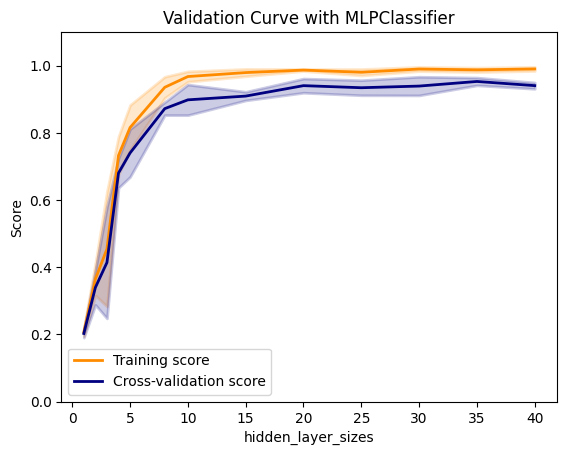

Nombre optimal de neurones cachés :  35
Matrice de confusion :
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0 48  0  0  0  0  1  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  2 60  0  2  0  0  0  0]
 [ 0  0  0  0 60  0  0  1  0  0]
 [ 0  1  1  1  0 43  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 55  1  1]
 [ 0  0  0  0  0  1  0  0 44  1]
 [ 0  0  0  0  0  2  0  0  0 55]]


In [5]:
# 3 - Cross-validation
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix

# Séparer la base d’apprentissage précédente en deux sets : apprentissage (80%) et validation croisée (20% : validation _fraction=0.2)
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, train_size=0.8, test_size=0.2)

C = [1, 2, 3, 4, 5, 8, 10, 15, 20, 25, 30, 35, 40]

clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2)
for i in range(10):
    clf2.fit(X_train,y_train)
train_scores, validation_scores = validation_curve(clf2, X_train, y_train, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", n_jobs=2)

# Calculer la moyenne et l'écart-type des taux en apprentissage et en validation pour chaque valeur de C
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(validation_scores, axis=1)
val_scores_std = np.std(validation_scores, axis=1)

# Afficher les résultats
print('Moyenne des scores en apprentissage :', train_scores_mean)
print('Ecart-type des scores en apprentissage :', train_scores_std)
print('Moyenne des scores en validation :', val_scores_mean)
print('Ecart-type des scores en validation :', val_scores_std)

# Tracer la courbe de validation
plt.title("Validation Curve with MLPClassifier")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(C, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(C, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(C, val_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(C, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# Choisir la meilleure valeur de C
optimal_C = C[np.argmax(val_scores_mean)]
print("Nombre optimal de neurones cachés : ", optimal_C)

# Entraîner le réseau avec la meilleure valeur de C
clf_optimal = MLPClassifier(hidden_layer_sizes=(optimal_C), activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='adaptive', early_stopping=True, validation_fraction=0.2)
clf_optimal.fit(X_train, y_train)

# Prédire les classes sur la base de test
y_pred = clf_optimal.predict(X_test)

# Afficher la matrice de confusion
print('Matrice de confusion :\n', confusion_matrix(y_test, y_pred))

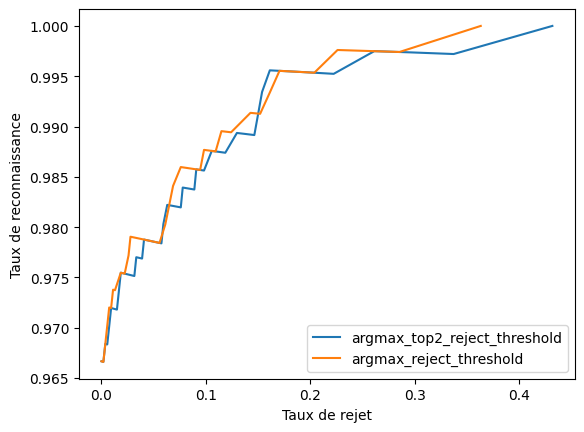

In [8]:
# 4 - Rejet
y_probs = clf_optimal.predict_proba(X_test)

thresholds = np.arange(0, 1.01, 0.01)

recognition_rates = []
rejection_rates = []

top2_recognition_rates = []
top2_rejection_rates = []

def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

for threshold in thresholds:
    # Prédire les labels avec rejet en utilisant la fonction argmax_reject_threshold
    y_pred_reject = argmax_reject_threshold(y_probs, threshold)

    y_top2_pred_reject = argmax_top2_reject_threshold(y_probs, threshold)

    # Calculer le nombre d'exemples bien classés et rejetés
    n_correct = np.sum(y_pred_reject == y_test)
    n_rejected = np.sum(y_pred_reject == -1)

    n_top2_correct = np.sum(y_top2_pred_reject == y_test)
    n_top2_rejected = np.sum(y_top2_pred_reject == -1)
    if (len(y_test) - n_rejected) != 0:
        recognition_rate = n_correct / (len(y_test) - n_rejected)
        rejection_rate = n_rejected / len(y_test)

        recognition_rates.append(recognition_rate)
        rejection_rates.append(rejection_rate)
    if (len(y_test) - n_top2_rejected) != 0: 
        top2_recognition_rate = n_top2_correct / (len(y_test) - n_top2_rejected)
        top2_rejection_rate = n_top2_rejected / len(y_test)

        top2_recognition_rates.append(top2_recognition_rate)
        top2_rejection_rates.append(top2_rejection_rate)
    
plt.plot(top2_rejection_rates, top2_recognition_rates, label='argmax_top2_reject_threshold')
plt.plot(rejection_rates, recognition_rates, label='argmax_reject_threshold')

# Afficher la légende et les axes
plt.legend()
plt.xlabel('Taux de rejet')
plt.ylabel('Taux de reconnaissance')
plt.show()

In [10]:
# 5 - Cascade de classifieurs
from sklearn.neighbors import KNeighborsClassifier

# Obtenir les prédictions de l'algorithme MLPClassifier
y_train_pred = clf_optimal.predict_proba(X_train)
y_train_pred_reject = argmax_reject_threshold(y_train_pred, 0.90)

# Créer un classifieur k-ppv
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le classifieur k-ppv sur les exemples rejetés, s'il y en a
X_rejected = X_train[y_train_pred_reject == -1]
y_rejected = knn.fit(X_train, y_train).predict(X_rejected)

y_test_final = knn.predict(X_test)
error_rate = (y_test_final != y_test).mean()

# Matrice de confusion du 1er étage
print('Matrice de confusion du 1er étage :\n', confusion_matrix(y_test, y_pred))

# Matrice de confusion de la cascade
cm_cascade = confusion_matrix(y_test, y_test_final)
print ("\nMatrice de confusion en sortie de cascade :")
print (cm_cascade)

Matrice de confusion du 1er étage :
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0 48  0  0  0  0  1  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  2 60  0  2  0  0  0  0]
 [ 0  0  0  0 60  0  0  1  0  0]
 [ 0  1  1  1  0 43  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 55  1  1]
 [ 0  0  0  0  0  1  0  0 44  1]
 [ 0  0  0  0  0  2  0  0  0 55]]

Matrice de confusion en sortie de cascade :
[[59  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  1  0  0]
 [ 0  0  1 63  0  0  0  0  0  0]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  1]
 [ 0  1  0  0  0  0  0  0 45  0]
 [ 0  0  0  1  0  1  0  0  0 55]]
